In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from sklearn.gaussian_process import GaussianProcessRegressor

# Guide and Ideas for Capstone Project

We begin this guide by downloading the data:

In [2]:
X = np.load('updated_data/function_4/inputs.npy')
Y = np.load('updated_data/function_4/outputs.npy')
X

array([[8.96981054e-01, 7.25627970e-01, 1.75404309e-01, 7.01694369e-01],
       [8.89356396e-01, 4.99587855e-01, 5.39268858e-01, 5.08783439e-01],
       [2.50946243e-01, 3.36931305e-02, 1.45380025e-01, 4.94932421e-01],
       [3.46962061e-01, 6.25040024e-03, 7.60563606e-01, 6.13023557e-01],
       [1.24871181e-01, 1.29770193e-01, 3.84400483e-01, 2.87076101e-01],
       [8.01302707e-01, 5.00231094e-01, 7.06644560e-01, 1.95102841e-01],
       [2.47708262e-01, 6.04454273e-02, 4.21863451e-02, 4.41324251e-01],
       [7.46702242e-01, 7.57091504e-01, 3.69353060e-01, 2.06566281e-01],
       [4.00665027e-01, 7.25742511e-02, 8.86768254e-01, 2.43842290e-01],
       [6.26070596e-01, 5.86751259e-01, 4.38805782e-01, 7.78857694e-01],
       [9.57135293e-01, 5.97644383e-01, 7.66113852e-01, 7.76209905e-01],
       [7.32812426e-01, 1.45249979e-01, 4.76812718e-01, 1.33365734e-01],
       [6.55115479e-01, 7.23918269e-02, 6.87151746e-01, 8.15165642e-02],
       [2.19734429e-01, 8.32031335e-01, 4.82864162e

# Upper Confidence Bound

A second alternative would be to use Bayesian Optimization and consider an Upper Confidence Bound acquisition function: 

In [3]:
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

GaussianProcessRegressor()

In [4]:
x1 = np.linspace(0.3, 0.6, 50)
dim = 4
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1,dim)

In [5]:
from shared import FormatOutputs, ProbImprovementAF

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std = True)
ucb = mean + 1.96 * std
pi = ProbImprovementAF(mean,std,np.max(Y))

#ucb
idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
FormatOutputs(next_query, "ucb")

#probability of improvemnet
idx_max = np.argmax(pi)
next_query = X_grid[idx_max]
FormatOutputs(next_query, "prob of improvement")

0.397959-0.348980-0.551020-0.416327: ucb
0.300000-0.300000-0.385714-0.355102: prob of improvement


## Visualizing our data and thinking of the problem

Reponse Plots

Text(0.5, 1.0, 'X4')

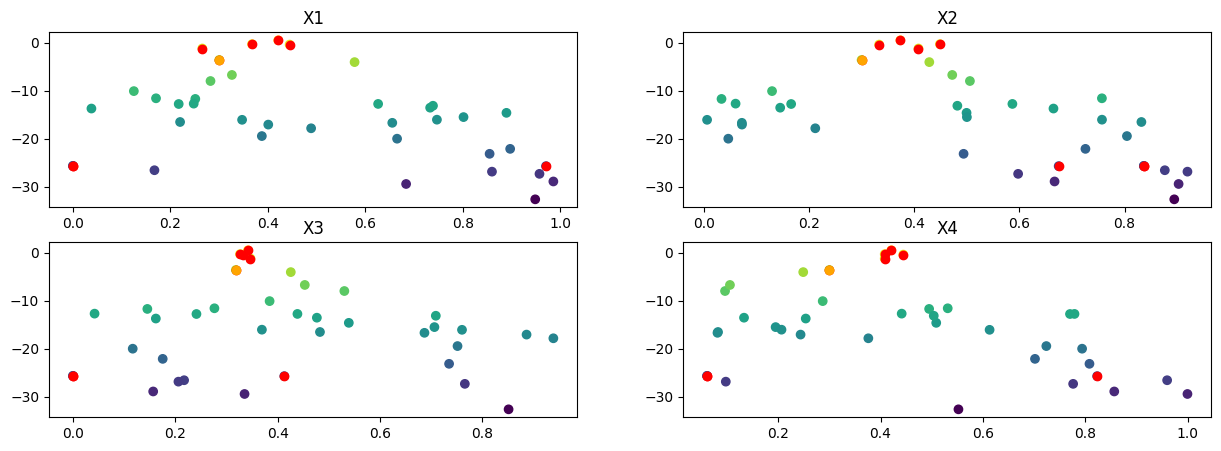

In [6]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(5)
fig.set_figwidth(15)
ax1.scatter(X[:, 0], Y, c = Y)
ax2.scatter(X[:,1], Y, c = Y)
ax3.scatter(X[:,2], Y, c = Y)
ax4.scatter(X[:,3], Y, c = Y)


from shared import Count_Submissions
ax1.scatter(X[Count_Submissions():, 0], Y[Count_Submissions():], c = 'red')
ax2.scatter(X[Count_Submissions():,1], Y[Count_Submissions():], c = 'red')
ax3.scatter(X[Count_Submissions():,2], Y[Count_Submissions():], c = 'red')
ax4.scatter(X[Count_Submissions():,3], Y[Count_Submissions():], c = 'red')

ax1.scatter(X[-1:, 0], Y[-1:], c = 'orange')
ax2.scatter(X[-1:,1], Y[-1:], c = 'orange')
ax3.scatter(X[-1:,2], Y[-1:], c = 'orange')
ax4.scatter(X[-1:,3], Y[-1:], c = 'orange')

ax1.set_title("X1")
ax2.set_title("X2")
ax3.set_title("X3")
ax4.set_title("X4")
